In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import re
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [71]:
data = pd.read_csv('nyc_real_estate.csv', index_col=False)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       387 non-null    int64 
 1   Name             387 non-null    object
 2   City             387 non-null    object
 3   Neighbourhood    387 non-null    object
 4   Price            387 non-null    object
 5   Year Built       387 non-null    object
 6   Beds             387 non-null    object
 7   Baths            387 non-null    object
 8   Area             387 non-null    object
 9   Price(per sqft)  387 non-null    object
 10  A/C              387 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.4+ KB


In [73]:
data = data.drop(labels = ['Unnamed: 0'], axis = 1)

In [74]:
data = data.replace("Null", pd.NA).dropna()

In [75]:
data['Price'] = data['Price'].str.replace('$', '')

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_25365/813483522.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')


In [76]:
data['Baths'] = data['Baths'].str.replace('Baths', '')

In [77]:
data['Baths'] = data['Baths'].str.replace('Bath', '')

In [78]:
data['Year Built'] = data['Year Built'].apply(lambda x : x[-4:])

In [79]:
data['Area']= data['Area'].apply(lambda x: x.strip('sqft'))
data['Area']= data['Area'].str.replace(',', '')

In [80]:
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)

In [ ]:
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Beds'] = data['Beds'].apply(lambda x: int(x))

In [81]:
data['Year Built'] = data['Year Built'].apply(lambda x : x[-4:])
data['Beds'] = data['Beds'].replace('S', 0.5)

In [82]:
data['Area'] = data['Area'].apply(lambda x: int(re.search(r'\d+', x).group()))
data['Price'] = data['Price'].apply(lambda x: int(re.search(r'\d+', x).group()))

In [ ]:
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)
data['Beds'] = data['Beds'].apply(lambda x : int(x))
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace(',', '').astype(int)
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : x.strip('sqft'))
data['Area (sqft)'] = data['Area (sqft)'].str.replace(',', '')
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : int(re.search(r'\d+', x).group()))

In [83]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,620,2022,0.5,1,441,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,730,2022,1,1,579,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,570,2022,0.5,1,429,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,695,2022,1,1,632,"$1,100",No
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,235,1970,1,1,850,$278,No
...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,635,1975,0.5,1,528,"$1,203",Cooling only
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,4,1845,5,6,3192,"$1,410",No
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,1,2008,2,2,1185,"$1,177",No
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,279,1974,2,1,1100,$254,Heating & Cooling


## What is the distribution of property types & pricing in New York?

Outlier detection paired with descriptive statistics (mean, mode, SD, etc.)

Histogram - traditional distribution plot to serve as a basis for understanding the broad scope of the NY Real Estate market

### SVM classification

In [84]:
target = "Baths"

X = data.drop(columns=[target,'Name','City','Neighbourhood','Price(per sqft)','A/C'])
y = data[target]

#X is just the measurements and y are just the labels

seed = 100
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [85]:
model = svm.SVC(gamma="scale",kernel="rbf")
#instantiation of the moderl and pass in hyper-parameters
model.fit(X_train, y_train)

SVC()

### SVC()

In [86]:
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#score model to get accuracy

Accuracy: 42.17%


In [87]:
y_pred

array(['1 ', '1 ', '1 ', '1 ', '1 ', '2 ', '1 ', '1 ', '1 ', '1 ', '1 ',
       '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ',
       '1 ', '2 ', '2 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ',
       '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ',
       '1 ', '1 ', '1 ', '1 ', '2 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ',
       '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ',
       '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ', '1 ',
       '1 ', '1 ', '1 ', '1 ', '1 ', '1 '], dtype=object)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.42168674698795183
[[31  0  0  0  0  0]
 [31  4  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 6  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 5  0  0  0  0  0]]
              precision    recall  f1-score   support

          1        0.39      1.00      0.56        31
          2        1.00      0.11      0.21        35
          3        0.00      0.00      0.00         4
          4        0.00      0.00      0.00         6
          5        0.00      0.00      0.00         2
          6        0.00      0.00      0.00         5

    accuracy                           0.42        83
   macro avg       0.23      0.19      0.13        83
weighted avg       0.57      0.42      0.30        83



/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### Naive Bayes Classification

In [89]:
model = GaussianNB()
#instantiate the model
model.fit(X_train, y_train)
#fit to the training data set (never fit to test dataset)
y_pred = model.predict(X_test)
# make predictions for test data
predictions = y_pred
#gives us a series of predictions and set to a new variable 
predictions

array(['6 ', '1 ', '2 ', '1 ', '1 ', '2 ', '2 ', '1 ', '2 ', '1 ', '2 ',
       '5 ', '1 ', '1 ', '1 ', '1 ', '1 ', '2 ', '1 ', '6 ', '1 ', '2 ',
       '6 ', '2 ', '2 ', '1 ', '1 ', '4 ', '1 ', '1 ', '1 ', '6 ', '1 ',
       '1 ', '4 ', '4 ', '1 ', '1 ', '2 ', '1 ', '4 ', '3 ', '4 ', '1 ',
       '2 ', '1 ', '2 ', '1 ', '2 ', '1 ', '3 ', '1 ', '1 ', '3 ', '2 ',
       '1 ', '2 ', '1 ', '1 ', '2 ', '1 ', '1 ', '4 ', '1 ', '1 ', '1 ',
       '6 ', '1 ', '1 ', '2 ', '1 ', '1 ', '2 ', '2 ', '1 ', '1 ', '2 ',
       '1 ', '1 ', '3 ', '1 ', '1 ', '5 '], dtype='<U2')

In [90]:
matches = pd.concat([pd.DataFrame(y_test.values).reset_index(),pd.DataFrame(predictions).reset_index()], axis=1)
#concatinate the test values put them next to our actual values. Row 17 is the first falsley predicted label
#Actual is veriscilor predicted is virginica (modle doenst get everything correct)

matches

,index,0,index,0
0,0,6,0,6
1,1,2,1,1
2,2,2,2,2
3,3,1,3,1
4,4,1,4,1
...,...,...,...,...
78,78,1,78,1
79,79,3,79,3
80,80,2,80,1
81,81,2,81,1


In [91]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
#actual number of posistives + true negatives / allsamples
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#confusion_matrix tells us where the model went wrong
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 81.93%
[[31  0  0  0  0  0]
 [15 20  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

          1        0.67      1.00      0.81        31
          2        1.00      0.57      0.73        35
          3        1.00      1.00      1.00         4
          4        1.00      1.00      1.00         6
          5        1.00      1.00      1.00         2
          6        1.00      1.00      1.00         5

    accuracy                           0.82        83
   macro avg       0.95      0.93      0.92        83
weighted avg       0.88      0.82      0.81        83



/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


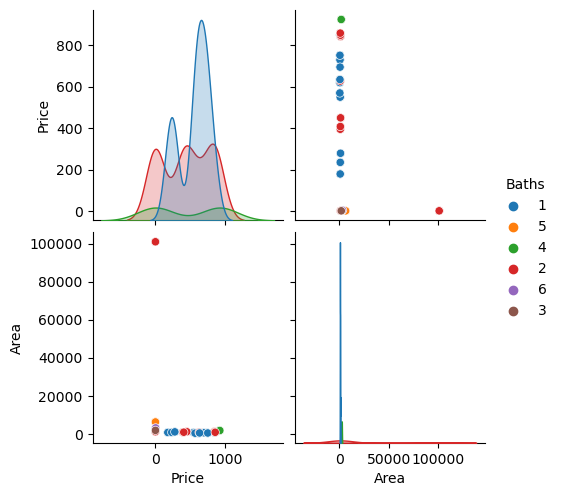

In [92]:
sns.pairplot(data,hue='Baths', size=2.5)

### Decision Tree Classifier

In [93]:
model = DecisionTreeClassifier(
    random_state=3, 
    criterion='entropy',
    splitter='best', 
    max_depth=3, 
    )

#decison trees are the same game as 20 questions on a dataset
#entropy is a measure of the predictablity in each class 
#max_depth 


model.fit(X_train,y_train)
#fit
y_pred = model.predict(X_test)
#predict
accuracy = model.score(X_test, y_test)
# evaluate predictions

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.95%


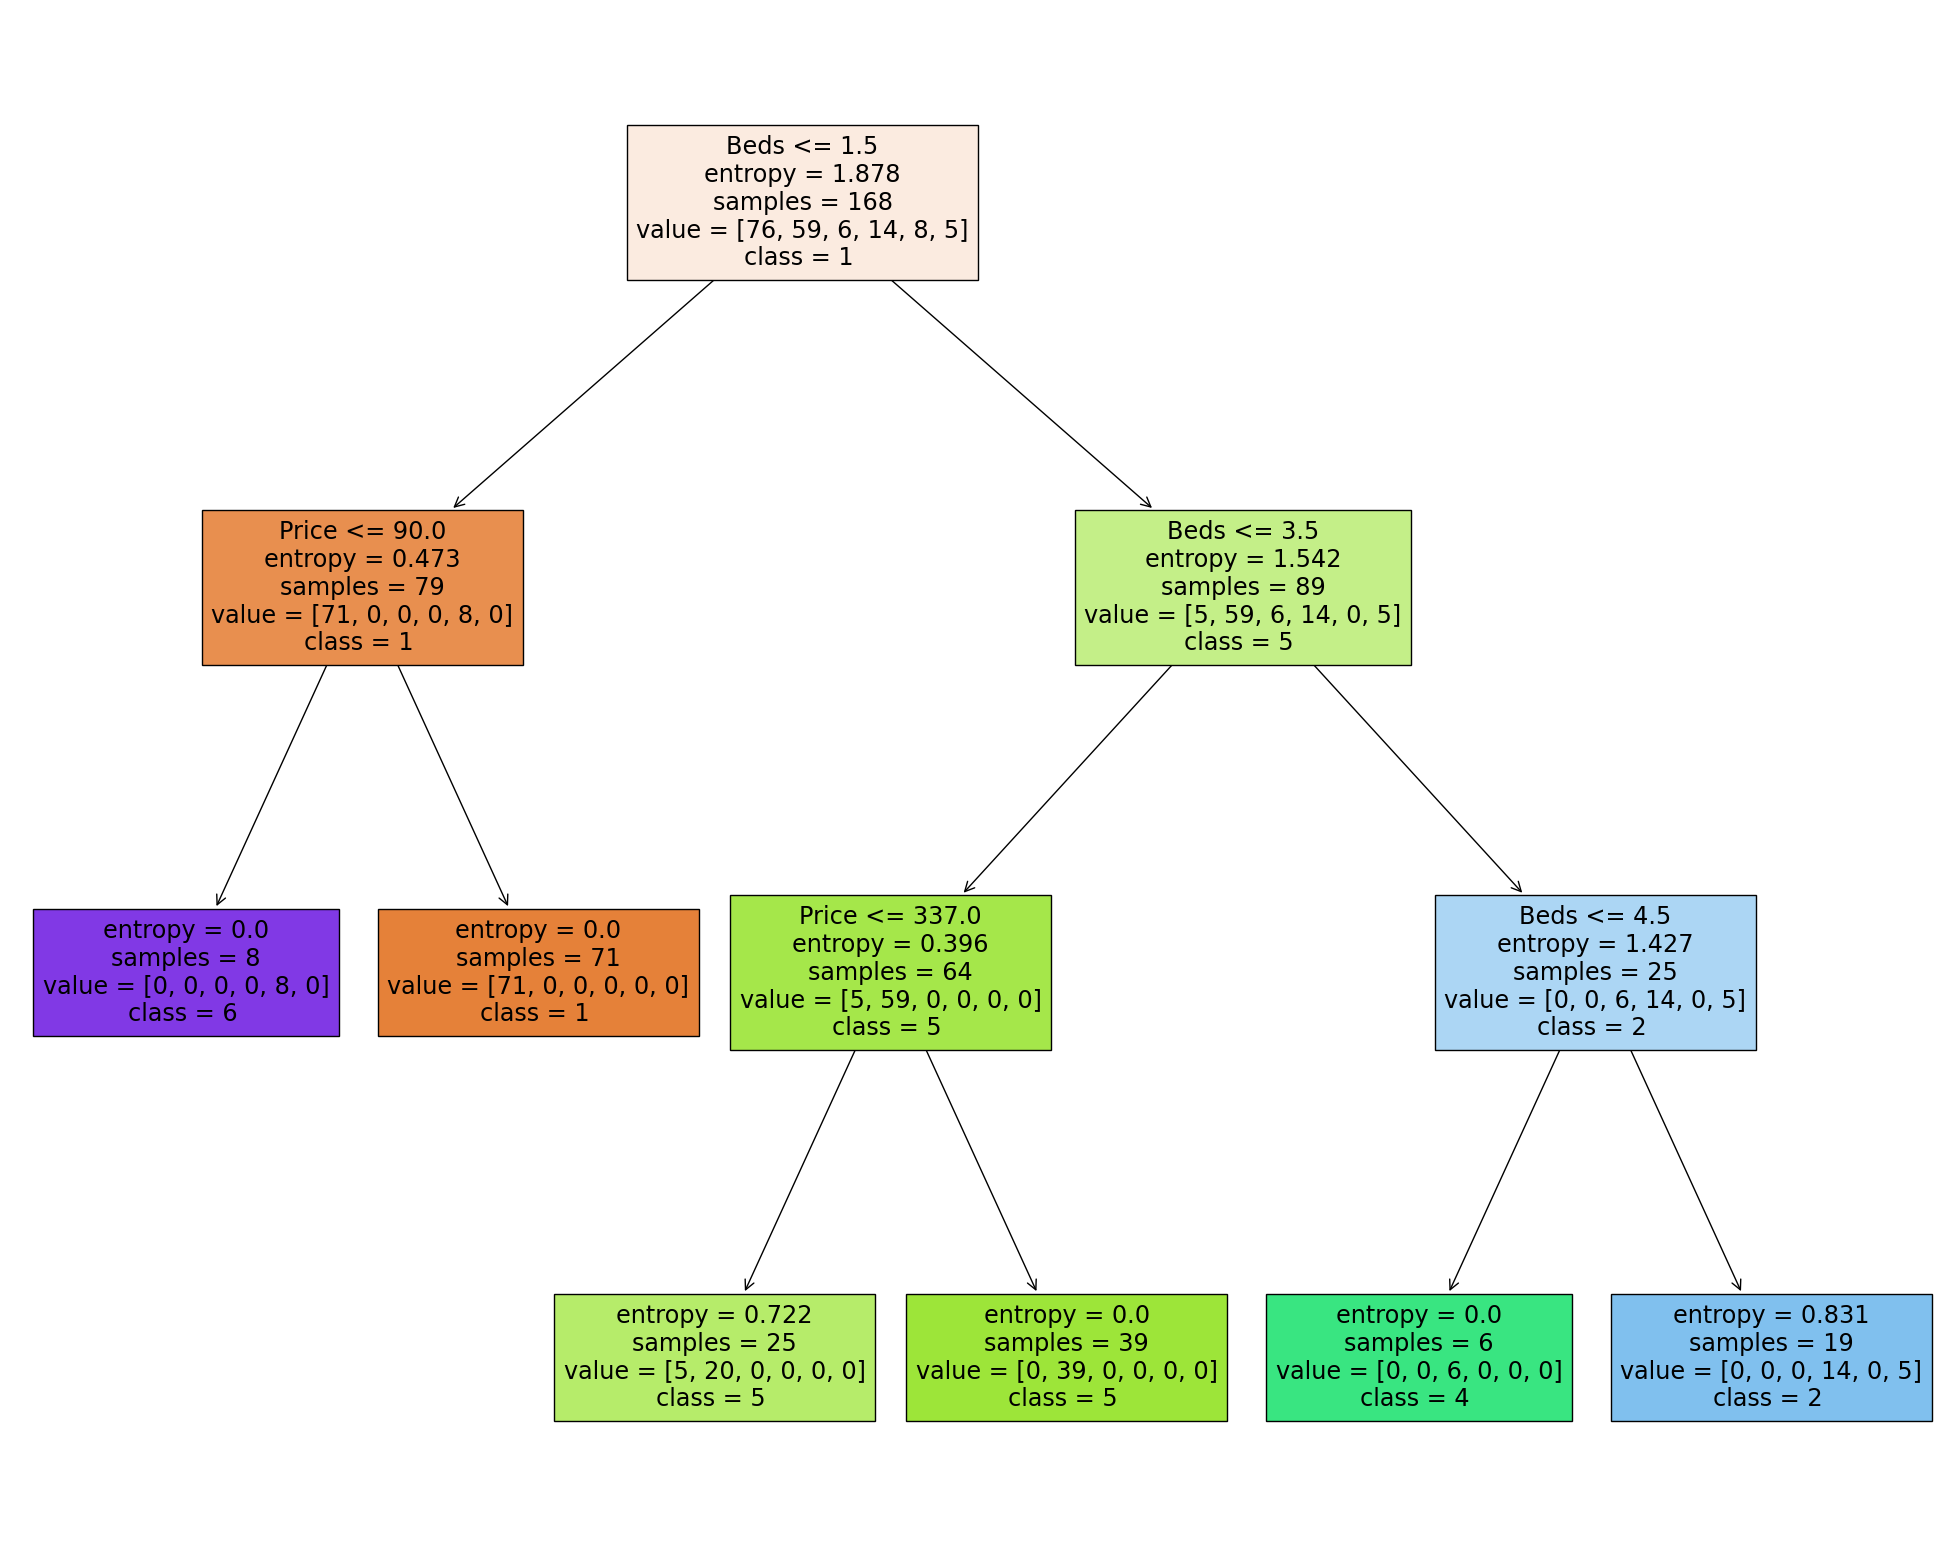

In [94]:
fig = plt.figure(figsize=(25,20))
# we use '_' to capture the return from plot_tree(...) and never do anything with it
_ = plot_tree(model, 
                feature_names=list(X.columns),  # ordered list of features
                class_names=list(y.unique()), # unique() is handy here due to numerical sorting of classes
                filled=True)

## Is there a correlation between the number of bedrooms and property price?

In [ ]:
olsreg = ols('Price ~ Beds', data=data).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     99.46
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           6.30e-20
Time:                        12:13:52   Log-Likelihood:                -3740.0
No. Observations:                 251   AIC:                             7484.
Df Residuals:                     249   BIC:                             7491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.29e+05   7.02e+04      6.113      0.000    2.91e+05    5.67e+05
Beds        2.828e+05   2.84e+04      9.973      0.000    2.27e+05    3.39e+05
==============================================================================
Omnibus:                      106.656   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.887
Skew:                           1.775   Prob(JB):                     5.98e-90
Kurtosis:                       8.166   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
r_squared = olsreg.rsquared
p_value = olsreg.f_pvalue

r_squared, p_value

(0.2854370344509515, 6.301769648197888e-20)

INTERPRETATION OF ABOVE: #OLS Regression - look for evidence of statistically significant correlation between bedrooms and property price

Text(463.154761904762, 0.5, 'Price ($)')

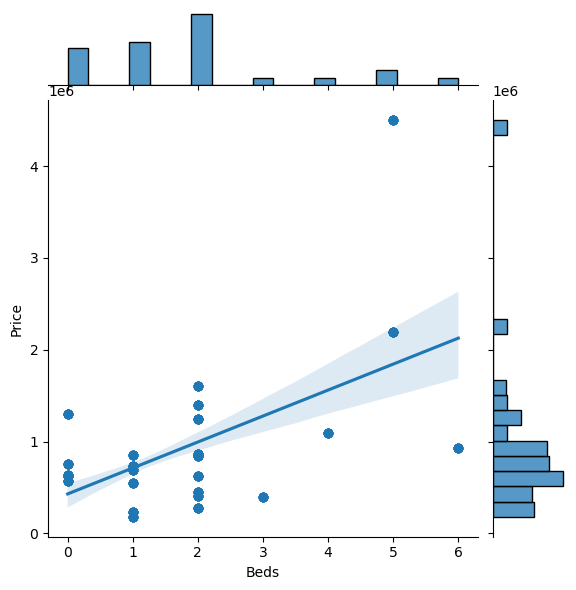

In [ ]:
jg = sns.JointGrid(x="Beds", y="Price", data=data)
jg.plot(sns.regplot, sns.histplot)
plt.xlabel("Number of Beds")
plt.ylabel("Price ($)")

In [ ]:
infl = olsreg.get_influence()
sm_fr = infl.summary_frame()
sm_fr
#SHOWs how many influence points are there for the above Q, according to statistically significant Cook's distances?

NameError: name 'olsreg' is not defined


INTERPRETATIONS: Regression Plot - visualize our regression results with a scatterplot and a line of best fit to graphically display correlation


## How does property price (price/sqft) vary across different neighborhoods in New York?

In [ ]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')
        

In [ ]:
#cleaning
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)
data['Beds'] = data['Beds'].apply(lambda x : int(x))
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace(',', '').astype(int)
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : x.strip('sqft'))
data['Area (sqft)'] = data['Area (sqft)'].str.replace(',', '')
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : int(re.search(r'\d+', x).group()))

In [ ]:
output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()
output = output.unstack().sort_values(key=abs, ascending=False).drop_duplicates().reset_index()
output.columns = ['var1', 'var2', 'correlation']
mask = output.apply(lambda x: x.var1 != x.var2, axis=1)
output = output[mask]
output[:5]

In [ ]:
data_pca = data[['Price', 'Year Built', 'Beds', 'Baths', 'Area (sqft)', 'Price(per sqft)']]
houses_X = data_pca.values
houses_Y = data_pca.index
from sklearn.preprocessing import scale
scale(houses_X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(houses_X))
X_pca_labelled = pd.concat([pd.DataFrame({'who':houses_Y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [ ]:
pca.explained_variance_

In [ ]:
np.cov(X_pca)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [ ]:
formula = 'Q("Year Built") ~ Baths'
model = smf.ols(formula=formula, data=data).fit()
model.summary()

## Does the presence of amenities (like air conditioning) have a statistically significant impact on property prices in New York?

In [129]:
data = data.rename(columns={'A/C': 'Air_Condition'})


In [130]:
def convert_condition(value):
    if value == 'No':
        return 0
    elif value == 'Cooling only':
        return 1
    else:
        return 2

In [131]:
data['Air_Condition'] = data['Air_Condition'].apply(convert_condition)
# convert air condition to numeric values with 0 representing no, 1 representing cooling, and 2 representing heating and cooling

In [132]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),Air_Condition
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,620000,2022,0,1,441 sqft,"$1,406",1
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,730000,2022,1,1,579 sqft,"$1,261",1
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,570000,2022,0,1,429 sqft,"$1,329",1
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,695000,2022,1,1,632 sqft,"$1,100",0
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,235995,1970,1,1,850 sqft,$278,0
...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,635000,1975,0,1,528 sqft,"$1,203",1
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,4500000,1845,5,6,"3,192 sqft","$1,410",0
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,1395000,2008,2,2,"1,185 sqft","$1,177",0
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,279900,1974,2,1,"1,100 sqft",$254,2


In [133]:
#multiple amenities including Bed, Bath, and Air Conditioning

In [134]:
ny_lm = ols('Price ~ Air_Condition + Baths + Beds', data=data).fit()
table = sm.stats.anova_lm(ny_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
Baths,9.030793e+13,5.0,208.057162,1.159443e-85
Air_Condition,1.644508e+12,1.0,18.943606,1.984394e-05
Beds,3.658383e+12,1.0,42.142083,4.735769e-10
Residual,2.109500e+13,243.0,NaN,NaN


In [135]:
data['Baths'] = data['Baths'].apply(lambda x: int(x))

In [136]:
med_am = data.groupby('Neighbourhood')[['Air_Condition', 'Baths', 'Beds']].median()
med_am

,Air_Condition,Baths,Beds
Neighbourhood,,,
Astoria,1.0,1.0,0.5
Battery Park,0.0,1.0,1.0
Baychester,2.0,2.0,2.0
Bedford Stuyvesant,1.0,3.0,3.5
Brooklyn Heights,0.0,6.0,5.0
Canarsie,2.0,4.0,6.0
Flushing,0.0,2.0,2.0
Gravesend,1.0,2.0,2.0
Heartland Village,2.0,2.0,2.0


ANOVA LM - analyze the amenity variables against property price while normalizing for different neighborhoods
Pair plot - Graph out each specific amenity’s impact on property pricing in NY


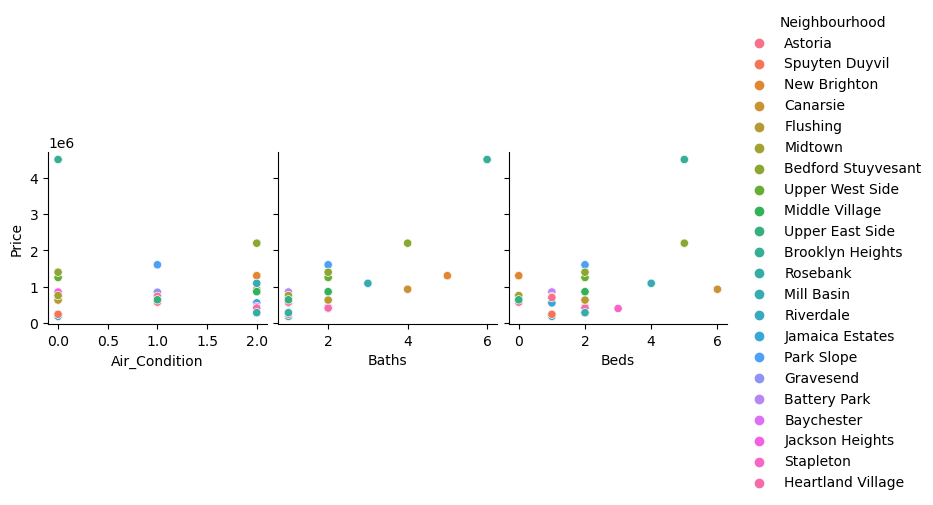

In [137]:
sns.pairplot(
    data, hue='Neighbourhood',
    x_vars=["Air_Condition", "Baths", "Beds"],
    y_vars=["Price"])

In [70]:
#Pair plot - Graph out each specific amenity’s impact on property pricing in NY
